In [4]:
import numpy as np
import nibabel as nib
import pandas as pd

In [6]:
img = nib.load('OAS30001_MR_d0129.nii')
#img2 = np.array(img.dataobj)
img2 = img.get_fdata()

In [7]:
df = pd.read_csv('OAS30001_MR_d0129.txt', header=None)
#landmark_x = df.iloc[:,0].values
#landmark_y = df.iloc[:,1].values
#landmark_z = df.iloc[:,2].values

In [10]:
landmark = df.iloc[:,:].values

In [11]:
landmark

array([[128, 117, 106],
       [128, 125, 100],
       [128, 109,  97],
       [127, 118, 162],
       [127, 123, 147],
       [128, 180,  86],
       [127, 124, 196],
       [128, 152,  53],
       [113, 118, 158],
       [144, 118, 159],
       [103, 118,  92],
       [155, 118,  87],
       [126, 109, 196],
       [127, 109,  48],
       [125, 109, 203],
       [126, 109,  42],
       [120, 182,  83],
       [167, 181,  83],
       [125,  57,  83],
       [125,  74,  83],
       [126,  99,  83]])

In [105]:
landmark_x

array([128, 128, 128, 127, 127, 128, 127, 128, 113, 144, 103, 155, 126,
       127, 125, 126, 120, 167, 125, 125, 126])

In [106]:
landmark_y

array([117, 125, 109, 118, 123, 180, 124, 152, 118, 118, 118, 118, 109,
       109, 109, 109, 182, 181,  57,  74,  99])

In [107]:
landmark_z

array([106, 100,  97, 162, 147,  86, 196,  53, 158, 159,  92,  87, 196,
        48, 203,  42,  83,  83,  83,  83,  83])

[]

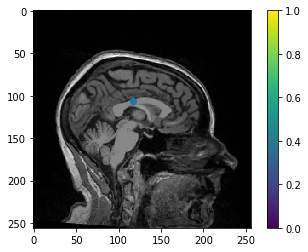

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img2[landmark_x[0],:,:],cmap='gray')
plt.scatter(landmark_y[0], landmark_z[0])
plt.colorbar()
plt.plot()


[]

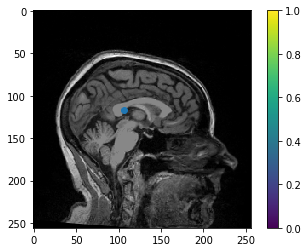

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img2[landmark_x[0],:,:],cmap='gray')
plt.scatter(landmark_z[0], landmark_y[0])
plt.colorbar()
plt.plot()

[]

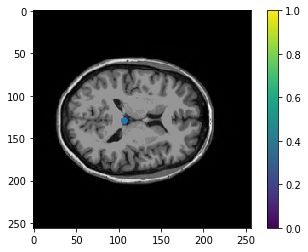

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img2[:,landmark_y[0],:],cmap='gray')
plt.scatter(landmark_z[0], landmark_x[0])
plt.colorbar()
plt.plot()

In [27]:
def __landmarks_to_volume__(coord, input_size):
    

    #''Converts Landmarks points to 3D space/volume'''

    coord = coord.astype(np.int32)
 
    mask = (coord[:, 0] >= 0) & (coord[:, 0] < input_size) & \
           (coord[:, 1] >= 0) & (coord[:, 1] < input_size) & \
           (coord[:, 2] >= 0) & (coord[:, 2] < input_size)

    #(coord[:, 1] >= 0) & (coord[:, 1] < input_size) & \

    #(coord[:, 2] >= 0) & (coord[:, 2] < input_size)

    coord = coord[mask, :]

    cubic = np.zeros((input_size, input_size, input_size))

  # Note, directly map point coordinate (x, y, z) to index (i, j, k), instead of (k, j, i)

  # Need to be consistent with heatmap generating and coordinates extration from heatmap

    cubic[coord[:, 0], coord[:, 1], coord[:, 2]] = 256

    return cubic

In [30]:
def plot_ACS_from3d_oas(image,x,y,z):
    fig,ax = plt.subplots(ncols=3,figsize=(100,100))
    ax[0].imshow(image[x,:,:])
    ax[1].imshow(image[:,y,:])
    ax[2].imshow(image[:,:,z])
    plt.show()

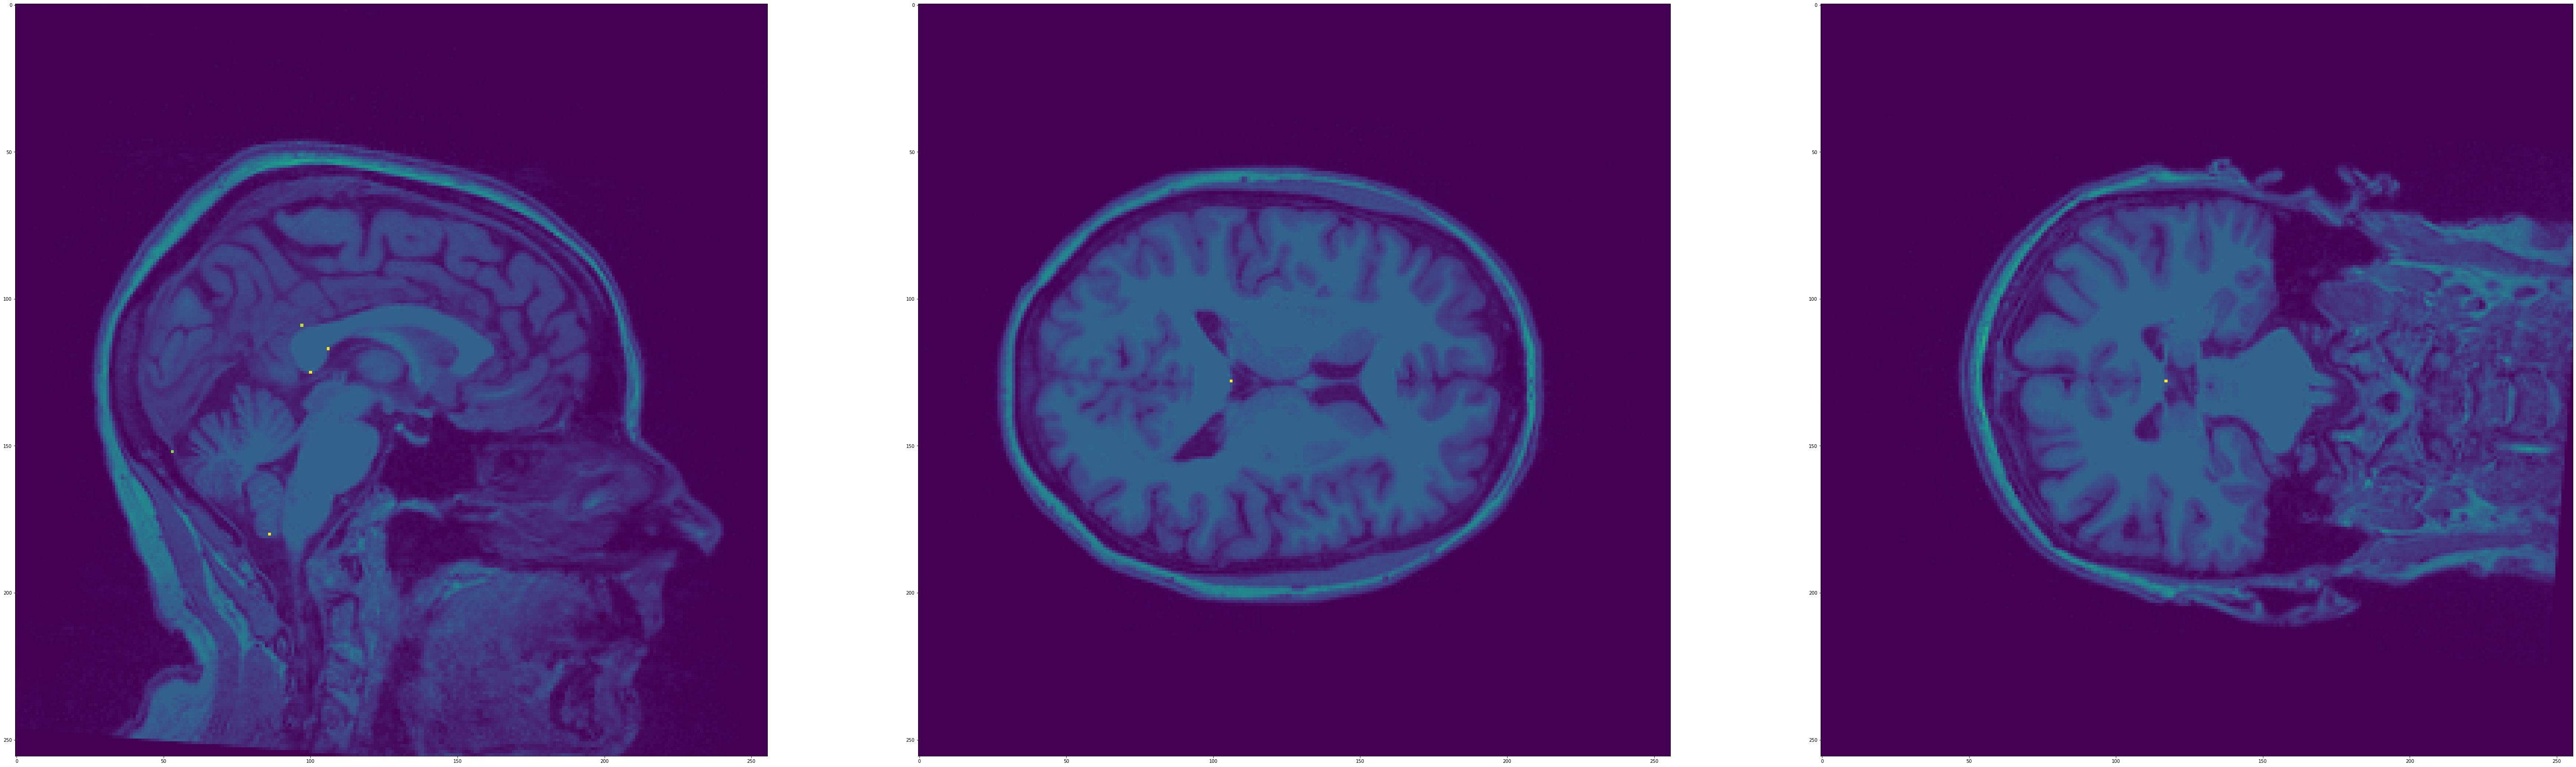

In [31]:
plot_ACS_from3d_oas(img2 + __landmarks_to_volume__(landmark,256),128,117,106)